# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
### YOUR CODE HERE
from sympy import diff, Symbol, cos, sin, tan, evalf

In [3]:
x = Symbol('x')
X0 = 1

In [4]:
def fx(x):
    return diff(tan(sin(x) + cos(2*x + 3))**2)

In [5]:
fx(x).evalf(subs = {'x':X0})

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

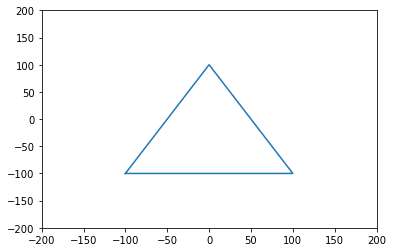

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


In [7]:
### YOUR CODE HERE

In [8]:
# Матрица смещения (сдвига)
T = [
      [1, 0, 0],
      [0, 1, 0],
      [200, 300, 1]
    ]
T = np.array(T)

In [9]:
# Матрица масштабирования

S = [
      [0.5, 0,   0],
      [0,   1.2, 0],
      [0,   0,   1]
    ]
S = np.array(S)

In [10]:
A1 = np.dot(A, T)
A1 = np.dot(A1, S)

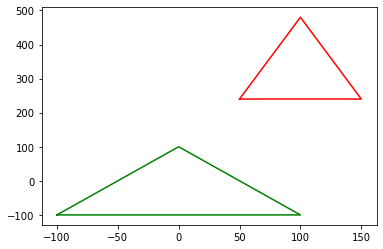

In [11]:
# A1 = np.array(A_displ)

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color = 'green')

x1 = A1[:,0]
y1 = A1[:,1]
plt.plot(x1, y1, color = 'red')
# plt.ylim([-200, 200])
# plt.xlim([-200, 200]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [12]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [13]:
### YOUR CODE HERE

In [14]:
# собсвтенные значения:
# вариант 1
np.linalg.eigvals(m)

array([ 3., -1.])

In [15]:
# Вариант 2
np.linalg.eig(m)[0]

array([ 3., -1.])

In [16]:
# собсвенные ветктора
np.linalg.eig(m)[1]

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [17]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [18]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

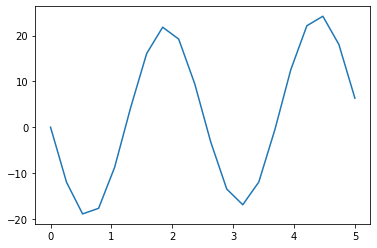

In [19]:
plt.plot(x, fx)
plt.show()

In [20]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [21]:
### YOUR CODE HERE

In [22]:
# первая выборка (наугад) для параметров a и b
params_initial = [0, 0]

# минимизация ошибки
result = minimize(error, params_initial, method='COBYLA')

print(f' a = {result.x[0]}')
print(f' b = {result.x[1]}')


 a = 3.0001879620826215
 b = -2.500089262452252


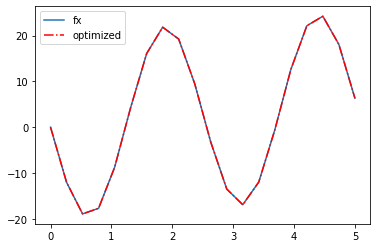

In [44]:

# график функции fx
plt.plot(x, fx, label='fx')

# оптимизированная функция
plt.plot(x, f(x, result.x[0], result.x[1]), label='optimized', linestyle = 'dashdot', color = 'red')

plt.legend()
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [24]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [25]:
### YOUR CODE HERE

In [26]:
# функциф вычисления косинусной меры
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [27]:
# цикл: перебрать каждого пользователя и найти наиболее похожего пользователя
for i, user1 in enumerate(raitings):
    similarities = []
    for j, user2 in enumerate(raitings):
        if i != j:
            similarity = cosine_similarity(user1, user2)
            similarities.append((j, similarity))
    most_similar = max(similarities, key = lambda x: x[1])
    print(f'Наиболее похожим пользователем для пользователя {i+1} является пользователь {most_similar[0]+1} с косинусным сходством {most_similar[1]:.2f}')

Наиболее похожим пользователем для пользователя 1 является пользователь 9 с косинусным сходством 0.91
Наиболее похожим пользователем для пользователя 2 является пользователь 5 с косинусным сходством 0.87
Наиболее похожим пользователем для пользователя 3 является пользователь 10 с косинусным сходством 0.92
Наиболее похожим пользователем для пользователя 4 является пользователь 10 с косинусным сходством 0.86
Наиболее похожим пользователем для пользователя 5 является пользователь 9 с косинусным сходством 0.88
Наиболее похожим пользователем для пользователя 6 является пользователь 10 с косинусным сходством 0.86
Наиболее похожим пользователем для пользователя 7 является пользователь 4 с косинусным сходством 0.83
Наиболее похожим пользователем для пользователя 8 является пользователь 6 с косинусным сходством 0.84
Наиболее похожим пользователем для пользователя 9 является пользователь 1 с косинусным сходством 0.91
Наиболее похожим пользователем для пользователя 10 является пользователь 3 с ко